# 次元削減

In [17]:
import sklearn as sk
import sklearn.decomposition as skd
import sklearn.discriminant_analysis as skda
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# 対象データの設定
DIRECTORIES = ["../windowed", "../windowed_boxcox"]
TIME_WINDOWS = [120, 180, 240]
N_SAMPLES = 80
BLE_IDS_NEW = [15070, 15158, 15159, 15160, 15161]
BLE_IDS_OLD = [15153, 15155, 15162, 15163, 15164]

## PCA による次元削減

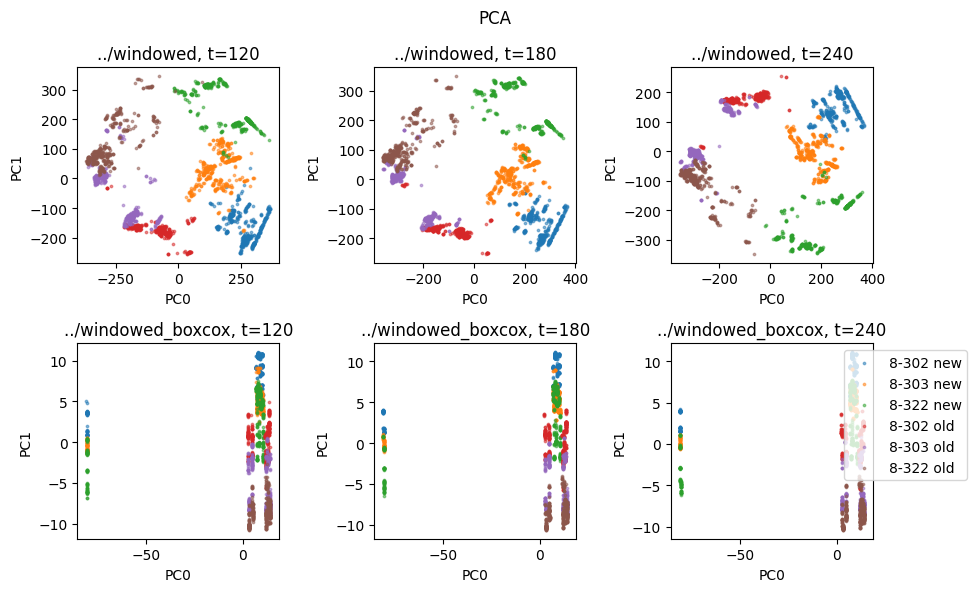

,PC0,PC1,Sum
"../windowed, t=120",0.462810,0.224469,0.687279
"../windowed, t=180",0.476787,0.223437,0.700223
"../windowed, t=240",0.487693,0.222771,0.710465
"../windowed_boxcox, t=120",0.908793,0.045335,0.954128
"../windowed_boxcox, t=180",0.911010,0.045345,0.956355
"../windowed_boxcox, t=240",0.912898,0.045221,0.958119


In [19]:
# プロットの初期化
fig, ax = plt.subplots(len(DIRECTORIES), len(TIME_WINDOWS), figsize=(10, 6))
fig.suptitle("PCA")

# 寄与率表の初期化
df_explained_variance_ratio = pd.DataFrame()

for i, directory in enumerate(DIRECTORIES):
    for j, time_window in enumerate(TIME_WINDOWS):
        df = pd.read_csv(f"{directory}/t={time_window}.csv")
        df = df.groupby(["label", "ble_id"]).sample(n=N_SAMPLES, random_state=0)

        pca = skd.PCA(n_components=2)
        pca.fit(df.drop("label", axis=1))

        dfs = {
            "new": df[df["ble_id"].isin(BLE_IDS_NEW)],
            "old": df[df["ble_id"].isin(BLE_IDS_OLD)],
        }

        for ble_id_type, typed_df in dfs.items():
            for label, df in typed_df.groupby("label"):
                ax[i][j].scatter(
                    pca.transform(df.drop("label", axis=1))[:, 0],
                    pca.transform(df.drop("label", axis=1))[:, 1],
                    label=f"{label} {ble_id_type}",
                    alpha=0.5,
                    s=3
                )

        ax[i][j].set_title(f"{directory}, t={time_window}")
        ax[i][j].set_xlabel("PC0")
        ax[i][j].set_ylabel("PC1")

        # 寄与率の保存
        df_explained_variance_ratio[f"{directory}, t={time_window}"] = {
            "PC0": pca.explained_variance_ratio_[0],
            "PC1": pca.explained_variance_ratio_[1],
            "Sum": pca.explained_variance_ratio_.sum()
        }

ax[-1][-1].legend(loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()

display(df_explained_variance_ratio.T)

## LDA による次元削減

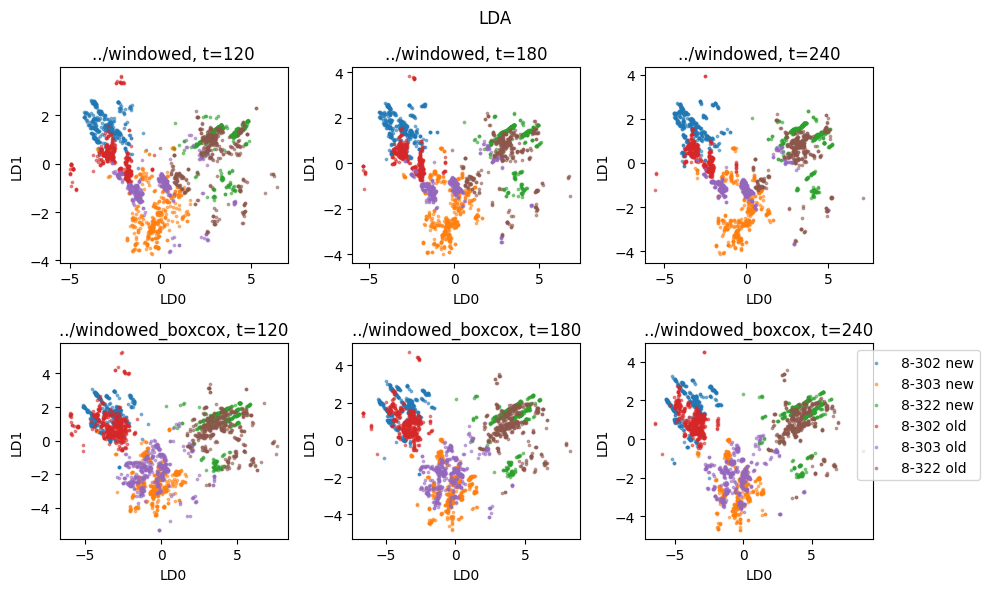

,LD0,LD1,Sum
"../windowed, t=120",0.833906,0.166094,1.0
"../windowed, t=180",0.836343,0.163657,1.0
"../windowed, t=240",0.838813,0.161187,1.0
"../windowed_boxcox, t=120",0.797730,0.202270,1.0
"../windowed_boxcox, t=180",0.801594,0.198406,1.0
"../windowed_boxcox, t=240",0.809555,0.190445,1.0


In [24]:
# プロットの初期化
fig, ax = plt.subplots(len(DIRECTORIES), len(TIME_WINDOWS), figsize=(10, 6))
fig.suptitle("LDA")

# 寄与率表の初期化
df_explained_variance_ratio = pd.DataFrame()

for i, directory in enumerate(DIRECTORIES):
    for j, time_window in enumerate(TIME_WINDOWS):
        df = pd.read_csv(f"{directory}/t={time_window}.csv")
        df = df.groupby(["label", "ble_id"]).sample(n=N_SAMPLES, random_state=0)

        lda = skda.LinearDiscriminantAnalysis(n_components=2)
        lda.fit(df.drop("label", axis=1), df["label"])

        dfs = {
            "new": df[df["ble_id"].isin(BLE_IDS_NEW)],
            "old": df[df["ble_id"].isin(BLE_IDS_OLD)],
        }

        for ble_id_type, typed_df in dfs.items():
            for label, df in typed_df.groupby("label"):
                ax[i][j].scatter(
                    lda.transform(df.drop("label", axis=1))[:, 0],
                    lda.transform(df.drop("label", axis=1))[:, 1],
                    label=f"{label} {ble_id_type}",
                    alpha=0.5,
                    s=3
                )

        ax[i][j].set_title(f"{directory}, t={time_window}")
        ax[i][j].set_xlabel("LD0")
        ax[i][j].set_ylabel("LD1")

        # 寄与率の保存
        df_explained_variance_ratio[f"{directory}, t={time_window}"] = {
            "LD0": lda.explained_variance_ratio_[0],
            "LD1": lda.explained_variance_ratio_[1],
            "Sum": lda.explained_variance_ratio_.sum(),
        }

ax[-1][-1].legend(loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()

display(df_explained_variance_ratio.T)